<a href="https://colab.research.google.com/github/tatha04/Spin_Clusters/blob/main/Spin_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def dec2dual(M,N):
  "Converts an integer M into a bitstring of length N"
  binary_string = bin(M)[2:].zfill(N)
  return [int(binary_string[N-1-i]) for i in range(N)]

In [115]:
class Spin_Cluster:
  """A class contains functions of a finite spin system
    N = Number of spins
    L = Number of links
    Site1,2: Sites corresponding to links
    J = Spin-exchange interactions
    alpha = x,y,z component of Ising-interactions"
  """
  
  def __init__(self,N,L,Site1,Site2,alpha,J):
    self.N = N
    self.L = L
    self.site1 = Site1
    self.site2 = Site2
    self.alpha = alpha
    self.J = J

    self.init_matrix() 
  
  def init_matrix(self):
    self.H0 = np.zeros((2**N,2**N))
    self.V  = np.zeros((2**N,2**N))
    self.E  = np.zeros(2**N)
    self.E_Deg = None
    self.N_Deg = None
    self.E_Deg_count = None
    
  def Hamiltonian(self):
    """ Set up the Hamiltonian of the spin cluster"""
    for i in range(2**self.N):
      z = dec2dual(i,self.N)
      for j in range(self.L):
        p = self.site1[j]
        q = self.site2[j]
        i_prime = i + (1-2*z[p-1])*2**(p-1) + (1-2*z[q-1])*2**(q-1)
        if (self.alpha[j] == 1):
          self.H0[i_prime,i] += self.J[j]
        elif (self.alpha[j] == 2):
          self.H0[i_prime,i] -= self.J[j]*(2*z[p-1]-1)*(2*z[q-1]-1)
        elif (alpha[j] == 3):
          self.H0[i,i] += self.J[j]*(2*z[p-1]-1)*(2*z[q-1]-1)

  def Eigen(self):
    """ Find out the eigenvalues and eigenvalues of the Hamiltonian Matrix"""
    self.E, self.V = np.linalg.eigh(self.H0)
    self.E_degeneracy()

  def plot_cluster(self):
    """ Plots the spin cluster"""
    
    # Co-ordinates for cluster
    cluster_x = [-1,1,1,-1,-2,2,2,-2]
    cluster_y = [1,1,-1,-1,2,2,-2,-2]
    fig = plt.figure()
    plt.xlim(-2.5,2.5); plt.ylim(-2.5,2.5)
    
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    link_color = ["red","green","blue"]
    plt.scatter(cluster_x,cluster_y)
    for i in range(self.L):
        x = [cluster_x[self.site1[i]-1],cluster_x[self.site2[i]-1]]
        y = [cluster_y[self.site1[i]-1],cluster_y[self.site2[i]-1]]
        plt.plot(x, y, color = link_color[alpha[i]-1])

  def E_degeneracy(self,acc = 1e-12):
    """ Find out the degenerate energy levels along with the degeneracy of the spectrum"""
    M_val = [0.0]; M_deg = [0]
    M_val[0] = self.E[0]; M_deg[0] = 1; count = 0;
    for i in range(1,2**N):
       if (abs(self.E[i] - M_val[count]) < acc):
          M_deg[count] += 1
       else:
          count += 1
          M_val.append(self.E[i])
          M_deg.append(1)
    self.E_Deg = M_val; self.N_Deg = M_deg; self.E_Deg_count = count+1

  def plot_Energy(self):
    fig = plt.figure()
    #title_string = string("Jx=",string(Jx),", Jy=",string(Jy),", Jz=",string(Jz));
    #plt.title(title_string);
    plt.bar(self.E_Deg,self.N_Deg);

  def print_Energy(self):
    print('Degeneracy  Energy')
    [print(f' {self.N_Deg[i]:5d}  {self.E_Deg[i]:10.4f}') for i in range(self.E_Deg_count)]
    print(f'Total No. of Degenerate Energy Levels = {self.E_Deg_count:5d}')

  def Thermodynamics(self):
    """ Calculate the specific heat as a function of temperature"""

  def Plaquette_Flux(self):
    """ Define the plaquette flux operators in the original basis.
    Calculate the expectation value of the flux operators in the ground state."""


In [108]:
# Parameters for a cubic Kitaev cluster
N = 8; L = 12;
Site1 = [1,2,3,4,5,6,7,8,1,2,3,4];
Site2 = [2,3,4,1,6,7,8,5,5,6,7,8];
alpha = [1,2,1,2,1,2,1,2,3,3,3,3];
J     = [1,1,1,1,1,1,1,1,1,1,1,1];

Degeneracy  Energy
     1     -6.9282
     3     -6.4721
    12     -5.8064
     3     -5.6569
    12     -5.4641
     6     -4.0000
    12     -3.4186
    24     -2.8284
     3     -2.4721
    12     -1.6121
    12     -1.4641
    56     -0.0000
    12      1.4641
    12      1.6121
     3      2.4721
    24      2.8284
    12      3.4186
     6      4.0000
    12      5.4641
     3      5.6569
    12      5.8064
     3      6.4721
     1      6.9282
Total No. of Degenerate Energy Levels =    23


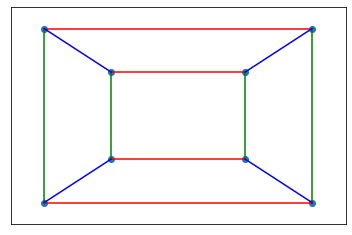

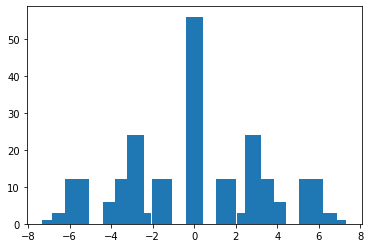

In [117]:
# Create a cubic Kitaev cluster
cube = Spin_Cluster(N,L,Site1,Site2,alpha,J)
# Compute the Hamiltonian of the cluster
cube.Hamiltonian()
# Compute the Eigenenergies and Eigenvalues of the cluster
cube.Eigen()
# Plot the cluster for visualization
cube.plot_cluster()
# Plot the energy levels
cube.plot_Energy()
# Print the degenerate energy levels
cube.print_Energy()